The following article contains material that may distress some readers. It is all based on data analyses of tweets containing the #MeToo hashtag in the past weeks and strives to be as objective as possible. We will make available the code used for the analyses. We welcome and encourage further analyses and dialog.
___

I have used the twitter API to pull half a million recent tweets that contain the hashtag #MeToo. Given half a million tweets, it is it impossible to give a summary of what they all contain. One method to give a sense of the most used words is a word cloud. Here are two word clouds: the first is generated from tweets tweeted between October 24th and November 7th; the second is from November 10th until November 11th. Can you see any differences? I'll discuss the most apparent below.

<img src="img/1st.png" alt="Word cloud 1">
<img src="img/ck.png" alt="Word cloud 2">

The most apparent difference to me is the change in names of alleged perpetrators: in the second word cloud, 'weinstein' is smaller and thus less represented in the tweets, 'billoreilly' is no longer present and new names, such as 'louisck' (who has admitted that '[These stories are true](https://www.nytimes.com/2017/11/10/arts/television/louis-ck-statement.html)') and 'roymoore' have now appeared. Related terms such as 'republican' have also appeared (Roy Moore is a Republican). Many of the words that appear will ring true. Others, which include twitter usernames such as 'aliceglass', are not so clear yet. In this post, I'll delve into these tweets and we'll see along the why such words appear in the word clouds. If you have any thoughts, responses and/or ruminations, feel free to reach out to me on twitter: [@hugobowne](https://twitter.com/hugobowne).

You can extract many of the main ideas surrounding #MeToo from these word clouds. For more context, [Wikipedia](https://en.wikipedia.org/wiki/Me_Too_(hashtag%29) states that
> "Me Too" (or "#MeToo", with local alternatives in other languages) spread virally as a two-word hashtag used on social media in October 2017 to denounce sexual assault and harassment, in the wake of sexual misconduct allegations against Harvey Weinstein. The phrase, long used in this sense by social activist Tarana Burke, was popularized by actress Alyssa Milano, who encouraged women to tweet it to publicize experiences to demonstrate the widespread nature of misogynistic behavior. Since then, millions of people have used the hashtag to come forward with their experiences, including many celebrities.

At the time of writing, Wikipedia also reported that

> The phrase had been used more than 200,000 times by October 15, and tweeted more than 500,000 times by October 16. On Facebook, the hashtag had been used by more than 4.7 million people in 12 million posts during the first 24 hours. The platform reported that 45% of users in the United States had a friend who had posted using the term.

and that 'The European Parliament convened a session directly in response to the Me Too campaign, after it gave rise to allegations of abuse in Parliament and in the European Union's offices in Brussels.' #MeToo is a movement that has gained a critical momentum over the past month. In this post, I'll look into how it has spread on twitter.

## A bird's eye view of two weeks with #metoo on twitter 

For this analysis, I used the twitter API to pull tweets containing #metoo from October 24th until November 7th. This is two weeks worth of tweets from about a week after the first #metoo tweet. The twitter API allows you to pull a subset of all tweets so, although the absolute number of tweets will not account for of them, you'll be able to see the overall trend. Lets first have a look at the number of tweets that occurred over time for the two weeks in question:

In [2]:
# Import modules & data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# You'll need to set the path to the data that you have pulled from the twitter API
df = pd.read_csv('tweets/metoo_11_09.csv')
df['dt'] = pd.to_datetime(df['dt'])
hour_counts = df.groupby(['dt'])['id'].count()

/Users/hugobowne/anaconda/envs/ds-twitter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


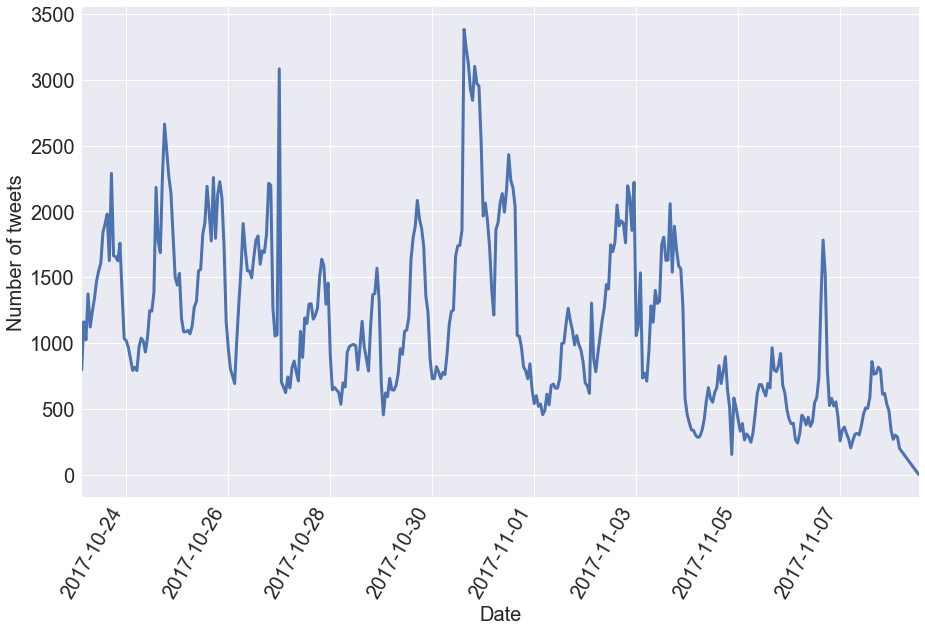

In [5]:
# Plot time series of total number of tweets
hour_counts.plot(lw=3, figsize=(15,10), rot=60);
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Date', fontsize=20);
# plt.rc('xtick',labelsize=20)
# plt.rc('ytick',labelsize=20)

Whereas the majority of hashtags have a half-life of minutes or hours, #MeToo has now been present for weeks as you can see from the above. It is a powerful enough movement to be manifesting itself not only online but also in [marches and protests](http://www.businessinsider.com/powerful-photos-from-the-metoo-march-in-hollywood-2017-11). Notice, in the figure above, that from Oct 23 through Oct 30, that is, from a week after the first tweet tagged with #MeToo until a week after that, the tag showed no signs of significantly less use. The total number of tweets per day is pretty steady over that week. Only in its 3rd week does it show a decrease.
Also note the 24 hour periodicity: the number of tweets is consistently at its lowest between 10pm and 12midnight Eastern Time and at its peak around 12noon Eastern Time. This is consistent with the majority of tweets originating in North America.

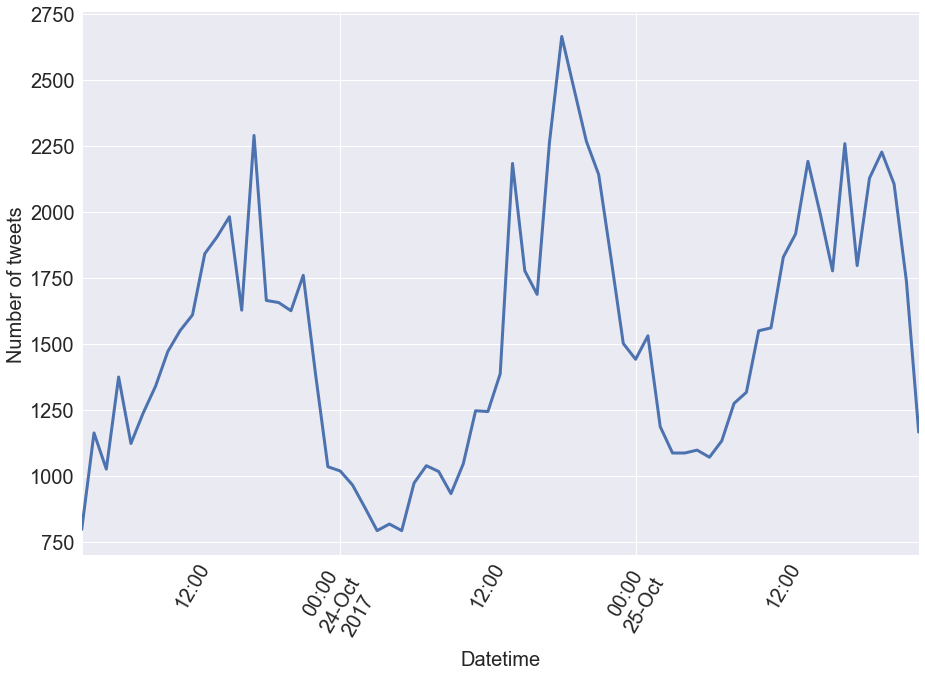

In [6]:
# Plot restricted (temporally) time series to view periodicity
hour_counts.loc['2017-10-23':'2017-10-25'].plot(lw=3, figsize=(15,10), rot=60);
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Datetime', fontsize=20);


As stated above, there is a decrease in the number of tweets over the two weeks in question, but let's probe this a bit further by looking at how many tweets were original tweets and how many were retweets over the period:

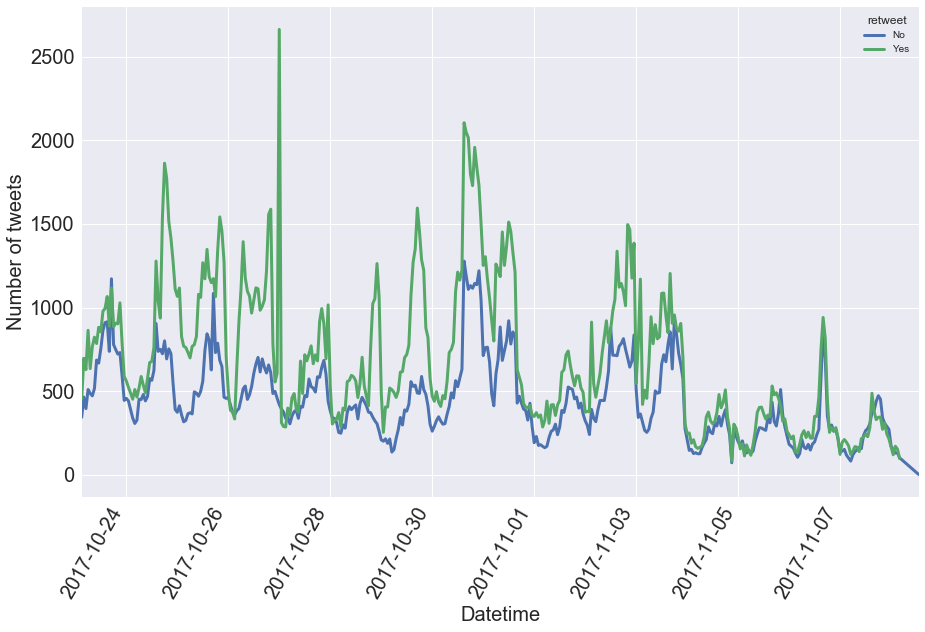

In [7]:
# Group by whether it is a retweet or not
df['retweet'] = df.retweeted_status.isnull() == 0 ## is it a retweet or not?
df['retweet'] = df['retweet'].map({1: 'Yes', 0: 'No'}) # Map to strings that mean something
hour_counts_by_rt = df.groupby(['dt', 'retweet'])['id'].count()

# Plot two time series: retweets and original tweets
hour_counts_by_rt.unstack(level=1).plot(lw=3, rot=60, figsize=(15,10));
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Datetime', fontsize=20);

We see from the above that the number of retweets consistently dominates the number of original tweets. Morever, the decrease we noted in total number of tweets over the two weeks is more pronounced in retweets than in original tweets. Looking at the number of original tweets by itself, you can see that there was a decrease but not as much as you would think from the initial plot:

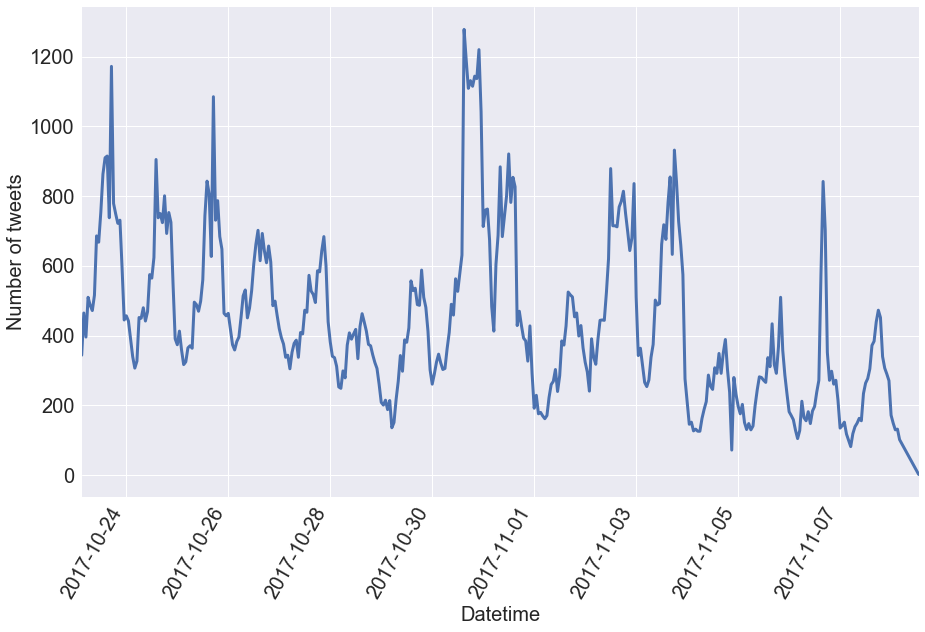

In [8]:
# Plot time series of original tweets
hour_counts = df[df['retweet'] == 'No'].groupby(['dt'])['id'].count()
hour_counts.plot(lw=3, figsize=(15,10), rot=60);
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Datetime', fontsize=20);

I noted above that the number of retweets was more than the number of original tweets. In fact, 60% of tweets with #metoo were retweets during this period:

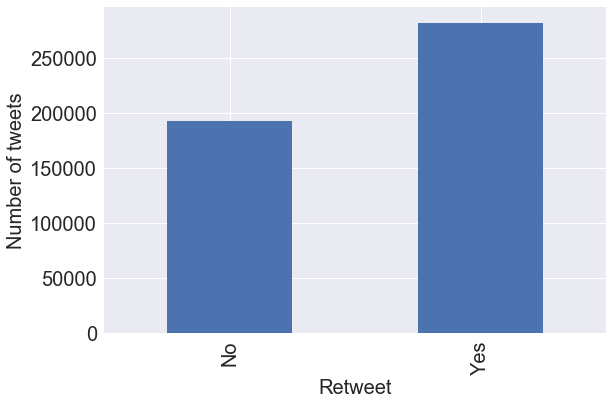

In [9]:
# Plot barplot of retweets and original tweets
df.groupby(['retweet'])['id'].count().plot(figsize=(9,6), kind='bar');
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Retweet', fontsize=20);

The question then emerges: out of half a million tweets, how many original tweets were responsible for all of these retweets? There were 100 tweets that were retweeted more than 1,000 times each at the time of analysis (there may be more now, as retweets keep happening). They account for ~62,000 (13 percent) of the total tweets captured. Note that many of the retweets will not have been captured by our tweet search.

There were 1,000 tweets that were retweeted at least over 100 times each and these accounted for over 25% of all tweets captured.

What were the top tweets? Let's check out the 5 tweets that had the most retweets at the time of analysis:

In [14]:
# How many tweets were retweeted > 1,000 times? 
yo = df.sort_values(by=['retweet_count'], ascending=False)
print(str(sum(yo.retweet_count > 1000)) + ' tweets resulted from original tweets retweeted > 1,000 times.')
rt_list = yo[yo.retweet_count > 1000].retweeted_status.tolist()
_ = []
for c in rt_list:
    try:
        _.append(int(c[55:73]))
    except:
        pass

print(str(len(set(_))) + ' original tweets accounted for these.')
print('They accounted for ' + str(len(_)/len(df)) + '% of total tweets.')
rt_list = yo[yo.retweet_count > 100].retweeted_status.tolist()
__ = []
for c in rt_list:
    try:
        __.append(int(c[55:73]))
    except:
        pass
# How many tweets were retweeted > 100 times? 
print(str(sum(yo.retweet_count > 100)) + ' tweets resulted from original tweets retweeted > 100 times.')
rt_list = yo[yo.retweet_count > 100].retweeted_status.tolist()
_ = []
for c in rt_list:
    try:
        _.append(int(c[55:73]))
    except:
        pass

print(str(len(set(_))) + ' original tweets accounted for these.')
print('They accounted for ' + str(len(_)/len(df)) + '% of total tweets.')

61938 tweets resulted from original tweets retweeted > 1,000 times.
101 original tweets accounted for these.
They accounted for 0.13022726507808294% of total tweets.
126451 tweets resulted from original tweets retweeted > 100 times.
1000 original tweets accounted for these.
They accounted for 0.2652106051427033% of total tweets.


What were the top tweets? Let's check out the 5 tweets that had the most retweets at the time of analysis:

In [16]:
# Top 5:
from collections import OrderedDict
list(OrderedDict.fromkeys(_))[:5]

[919902089110872064,
 920149248880009217,
 919756449965838336,
 920453826364235776,
 919732300862181377]

By hand, I then checked out these tweets and embedded them below.

In [3]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

In [10]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Reminder that if a woman didn&#39;t post <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a>, it doesn&#39;t mean she wasn&#39;t sexually assaulted or harassed. Survivors don&#39;t owe you their story.</p>&mdash; Alexis Benveniste (@apbenven) <a href="https://twitter.com/apbenven/status/919902089110872064?ref_src=twsrc%5Etfw">October 16, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [11]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">For my wife, for my daughters, for all women...I stand with all of you.  This has gotta change.  <a href="https://twitter.com/hashtag/metoo?src=hash&amp;ref_src=twsrc%5Etfw">#metoo</a> <a href="https://twitter.com/hashtag/nomore?src=hash&amp;ref_src=twsrc%5Etfw">#nomore</a></p>&mdash; Jensen Ackles (@JensenAckles) <a href="https://twitter.com/JensenAckles/status/920149248880009217?ref_src=twsrc%5Etfw">October 17, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [12]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">For those carrying their <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> with them silently, you are loved, cherished, and believed. You do not owe your story to anyone.</p>&mdash; Grace Starling (@GraceStarling4) <a href="https://twitter.com/GraceStarling4/status/919756449965838336?ref_src=twsrc%5Etfw">October 16, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [13]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr"><a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a>. I was 14, he was 36. I may be Deaf, but silence is the last thing you will ever hear from me. <a href="https://t.co/hLmBJ7PgmK">pic.twitter.com/hLmBJ7PgmK</a></p>&mdash; Marlee Matlin (@MarleeMatlin) <a href="https://twitter.com/MarleeMatlin/status/920453826364235776?ref_src=twsrc%5Etfw">October 18, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [14]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="und" dir="ltr"><a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> <a href="https://t.co/VWssdltU3n">https://t.co/VWssdltU3n</a></p>&mdash; Monica Lewinsky (@MonicaLewinsky) <a href="https://twitter.com/MonicaLewinsky/status/919732300862181377?ref_src=twsrc%5Etfw">October 16, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

These were the most _retweeted_ across the board at the time of analysis. What about the tweets that were retweeted most in the data collected? Let's check these out:

In [17]:
# Top 5 retweeted in data collected
from collections import Counter
d = Counter(_).most_common(5)
d


[(922875671021436928, 9907),
 (924954161510150145, 9330),
 (923300624665419776, 6639),
 (925998002967375872, 4393),
 (924464132493000704, 3562)]

Again, I checked out these tweets by hand and embedded them below.

In [16]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">this is why I had to leave Crystal Castles. here is my story: <a href="https://t.co/bs9aJRwgms">https://t.co/bs9aJRwgms</a> <a href="https://twitter.com/hashtag/metoo?src=hash&amp;ref_src=twsrc%5Etfw">#metoo</a></p>&mdash; ALICE GLASS (@ALICEGLASS) <a href="https://twitter.com/ALICEGLASS/status/922875671021436928?ref_src=twsrc%5Etfw">October 24, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

'ALICEGLASS' was a username in the initial word cloud. It is now apparent that her username was there as she was retweeted so much in the tweets collected. Alice Glass is a singer-songwriter who co-founded and fronted the electronic band Crystal Castles, who left the band and you can read her statement [here](http://www.alice-glass.com/cc/). The significant number of retweets is also why the words 'Crystal' and 'Castle' appear in the word cloud.

In [17]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">There is no easy way to tell you. But it’s time. <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> <a href="https://t.co/HnwugEWtJF">https://t.co/HnwugEWtJF</a></p>&mdash; Breanna Stewart (@bre_stewart30) <a href="https://twitter.com/bre_stewart30/status/924954161510150145?ref_src=twsrc%5Etfw">October 30, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [18]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="und" dir="ltr">I la diputada s&#39;ha quedat sola denunciant l&#39;assetjament sexual a les dones. Quina pena i quina vergonya. <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a><br>© Patrick Hertzog/AFP <a href="https://t.co/AtCxumRu5Z">pic.twitter.com/AtCxumRu5Z</a></p>&mdash; Eva Piquer (@EvaPiquer) <a href="https://twitter.com/EvaPiquer/status/923300624665419776?ref_src=twsrc%5Etfw">October 25, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [19]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="fr" dir="ltr">Formidable dessin de PrincessH dans <a href="https://twitter.com/LaCroix?ref_src=twsrc%5Etfw">@LaCroix</a>.<a href="https://twitter.com/hashtag/harcelement?src=hash&amp;ref_src=twsrc%5Etfw">#harcelement</a> <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> <a href="https://t.co/JFm1do6WlO">pic.twitter.com/JFm1do6WlO</a></p>&mdash; Frédéric Pommier (@fred_pom) <a href="https://twitter.com/fred_pom/status/925998002967375872?ref_src=twsrc%5Etfw">November 2, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [20]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="ko" dir="ltr">세계 최고 수준 성평등을 이뤘다고 자랑하던 스웨덴에선<br>지금 여성들의 성폭력 고발이 봇물처럼 쏟아지고 있다<br><br>스웨덴 ‘미투’<a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> 운동을 보며<a href="https://t.co/yNx73XQXMz">https://t.co/yNx73XQXMz</a> <a href="https://t.co/ZeLtOLCaIi">pic.twitter.com/ZeLtOLCaIi</a></p>&mdash; 여성신문 (@wnewskr) <a href="https://twitter.com/wnewskr/status/924464132493000704?ref_src=twsrc%5Etfw">October 29, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)





So we have other languauges represented in numbers, which is interesting. What started as movement in North America and English language has not only spread to other languages, but has done so in a signifant way, as evidenced by the fact that Spanish, French and Korean tweets appear in the top 5 being retweeted in the two weeks analayzed. Let's now  explore the distribution of tweets across languages a bit further.

## The spread of #metoo around the globe

First up, lets look at the languages represented in all the tweets containing #metoo and check out how often they occur:

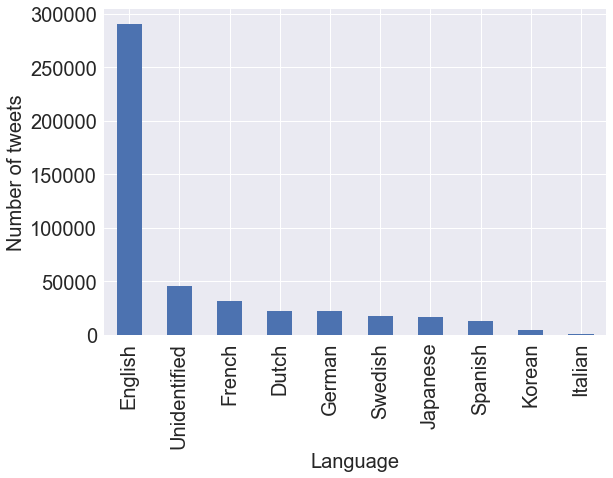

In [19]:
# Map Language to human-readable language name
df['Language'] = df['lang'].map({'en': 'English', 'und': 'Unidentified', 'fr': 'French', 'nl': 'Dutch',
                                'de': 'German', 'sv': 'Swedish', 'ja': 'Japanese', 'es': 'Spanish', 'ko': 'Korean',
                                'it': 'Italian'})


# Plot barplot of number of tweets by language
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Language', fontsize=20);
df.groupby(['Language'])['id'].count().sort_values(ascending=False).head(n=10).plot(figsize=(9,6), kind='bar');

English dominates, then unidentified. Then we have French, Dutch, German, Swedish, Japanese, Spanish and Korean. As we have counts over several scales (that is, in the thousands, tens of thousands and hundreds of thousands), it makes sense to plot this figure with a logarithmic y axis, which means that the visual distance between $10^3$ (one thousand) and $10^4$ (ten thousand) is the same as the visual distance between $10^4$ and $10^5$ ( one hundred thousand):

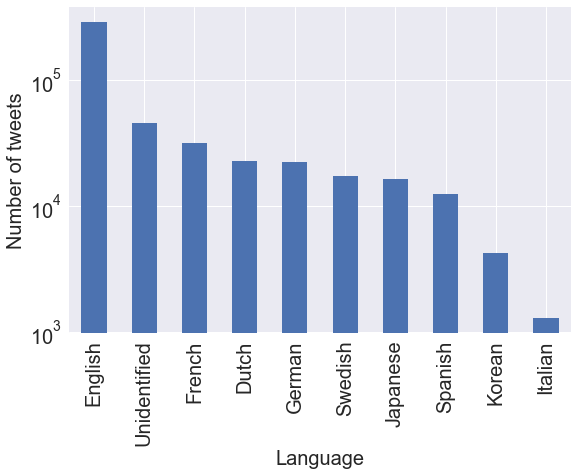

In [20]:
# Plot barplot w/ log y
df.groupby(['Language'])['id'].count().sort_values(ascending=False).head(n=10).plot(figsize=(9,6), 
                                                                                    kind='bar', logy=True);
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Language', fontsize=20);

We can now see that, although English does dominate , there _are_ several other languages each having tens of thousands of tweet each: French, Dutch and and Japanese, to name several. In fact, nearly 40% of tweets are represented by foreign languages or unidentified languages (which are often foreign and just not detectable by the algorithm twitter uses). 

In [21]:
# how many tweets were English language?
df['en'] = df['lang'] == 'en'
df.en.sum()/len(df)

0.6103552436725902

Let's now delve into how the use of different languages using the #metoo hashtag varied over the two weeks:

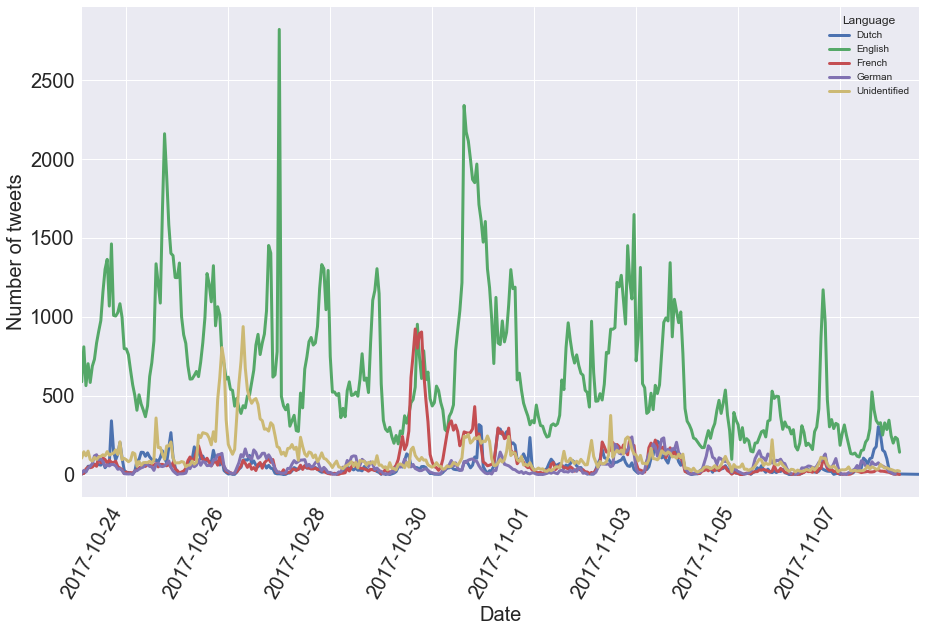

In [22]:
# Plot time series of top 5 languages
langs = list(df.groupby(['Language'])['id'].count().sort_values(ascending=False).head(n=5).index)
hour_counts_by_lang = df[df['Language'].isin(langs)].groupby(['dt', 'Language'])['id'].count()

hour_counts_by_lang.unstack(level=1).plot(lw=3, rot=60, figsize=(15,10));

plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Date', fontsize=20);

There are at least three aspects of this figure that grab my attention and that are worth further investigation:
* on October 26, there's a peak of unidentified languages when English is at a low;
* on October 30, the number of French tweets shoots up to the number of English language tweets;
* On November 08, the number of Dutch tweets has a spike and gets close to the number of tweets in English.

Let's now investigate these.

## The spike in unidentified language tweets

An explanation  for the spike in unidentified language tweets is the retweeting of the following tweet in Catalan from Eva Piquer:

In [4]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="und" dir="ltr">I la diputada s&#39;ha quedat sola denunciant l&#39;assetjament sexual a les dones. Quina pena i quina vergonya. <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a><br>© Patrick Hertzog/AFP <a href="https://t.co/AtCxumRu5Z">pic.twitter.com/AtCxumRu5Z</a></p>&mdash; Eva Piquer (@EvaPiquer) <a href="https://twitter.com/EvaPiquer/status/923300624665419776?ref_src=twsrc%5Etfw">October 25, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

Twitter's algorithm couldn't identify the language of this tweet, Catalan, which was retweeted a whopping 4,876 times on Thursday October 26th.

## The spike in French tweets

On October 30th, the spike in French language tweets was due to the retweeting of the following three tweets, which had 555, 347 and 327 retweets respectively:

In [5]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="fr" dir="ltr">A la manif, on trouve les 4 phrases à dire à une femme victime.<a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> <a href="https://twitter.com/hashtag/Balancetonporc?src=hash&amp;ref_src=twsrc%5Etfw">#Balancetonporc</a> <a href="https://t.co/3lmauq3U4S">pic.twitter.com/3lmauq3U4S</a></p>&mdash; Caroline De Haas (@carolinedehaas) <a href="https://twitter.com/carolinedehaas/status/924654851149189120?ref_src=twsrc%5Etfw">October 29, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [6]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="fr" dir="ltr">Morgane était à la manifestation <a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> à Paris. Pour elle, cette mobilisation ne doit être qu’un début. <a href="https://t.co/m0SWleuwJN">pic.twitter.com/m0SWleuwJN</a></p>&mdash; Brut FR (@brutofficiel) <a href="https://twitter.com/brutofficiel/status/924961633654530048?ref_src=twsrc%5Etfw">October 30, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

In [7]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="fr" dir="ltr">Celle ci, je l’aime bcp bcp!<a href="https://twitter.com/hashtag/MeToo?src=hash&amp;ref_src=twsrc%5Etfw">#MeToo</a> <a href="https://t.co/b5bBA4VC8D">pic.twitter.com/b5bBA4VC8D</a></p>&mdash; caroline le diore (@DioreLd) <a href="https://twitter.com/DioreLd/status/924667126744576000?ref_src=twsrc%5Etfw">October 29, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

Also note that the first tweet above also contains the hashtag #Balancetonporc which translates into English as 'expose your pig'. #balancetonporc and slight variants occurs in 27% of French language #MeToo tweets and is now considered to be a French analog of #MeToo. You can read more [here](https://www.vox.com/world/2017/10/18/16490818/france-me-too-weinstein-sexual-harassment).

What about the small spike in Dutch language tweets? I'll leave that as a challenge to the avid reader.

## Conclusion

In this post, you saw that the #MeToo movement has gained a sustained momentum and that, although it started in North America, its reach has spread around the globe. You saw through twitter data visualisation alone (word clouds of half a million tweets) that new revelations and allegations have occured after the first usage of the hashtag and it is reasonable to conclude that this is playing a part in its sustained momentum. You also saw that many of the tweets are retweets, which suggests that engagement is high, even for those not making original tweets themselves. In the coming days, I'll make available the code used to pull the tweets from twitter and perform the above analysis. I warmly encourage you to see what else you can find in the data. This is no substitute for reading widely around the subject and discussing with people IRL.

If you have any thoughts, responses and/or ruminations, feel free to reach out to me on twitter: [@hugobowne](https://twitter.com/hugobowne).